In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/SH0402/', width=128)

(137, 418, 573)
(84, 418, 573)
(20, 418, 573)
(61, 586, 400)
(70, 586, 400)
(75, 586, 400)


In [3]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 447
number of class 0: 198
	number of SN: 10
number of class 1: 154
	number of SN: 10
number of class 3: 95
	number of SN: 9


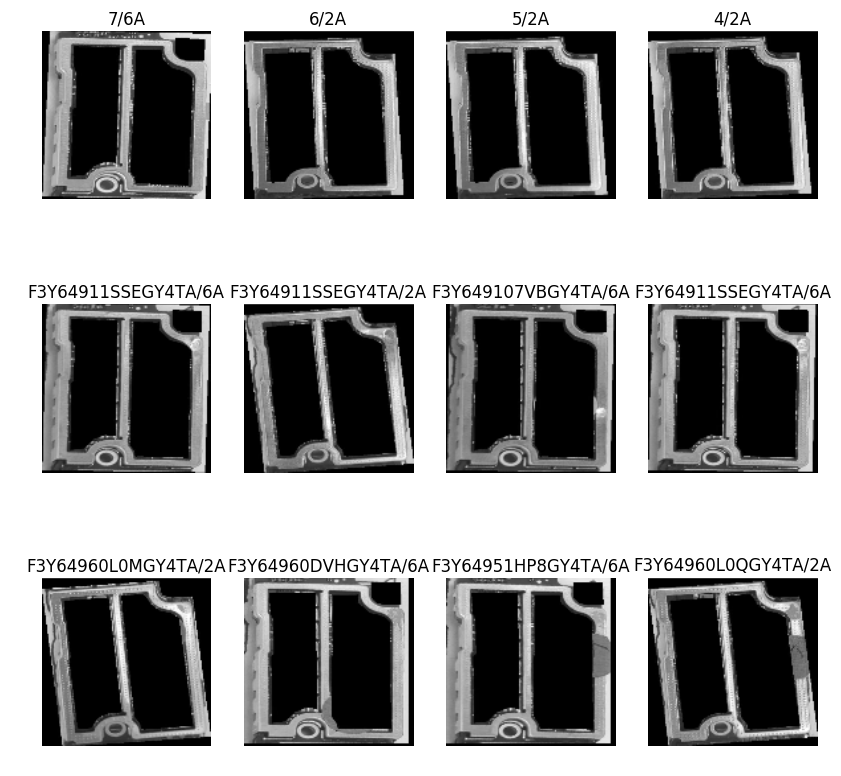

In [4]:
display_tensor(tensors, labels, sns)

In [5]:
from defectlib import GroupKFold_modeling

In [6]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=4, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 1
the s/n of validation image: F3Y6492040YGY4TA
Train on 422 samples, validate on 25 samples
Epoch 1/30
422/422 [==============================] - 11s - loss: 1.1468 - acc: 0.4597 - val_loss: 1.0499 - val_acc: 0.6000
Epoch 2/30
422/422 [==============================] - 9s - loss: 0.8776 - acc: 0.6019 - val_loss: 0.9171 - val_acc: 0.0000e+00
Epoch 3/30
422/422 [==============================] - 10s - loss: 0.7816 - acc: 0.6706 - val_loss: 0.5010 - val_acc: 1.0000
Epoch 4/30
422/422 [==============================] - 10s - loss: 0.6672 - acc: 0.7062 - val_loss: 0.4591 - val_acc: 0.6800
Epoch 5/30
422/422 [==============================] - 9s - loss: 0.5450 - acc: 0.7464 - val_loss: 1.1745 - val_acc: 0.2800
Epoch 6/30
422/422 [==============================] - 9s - loss: 0.4939 - acc: 0.7915 - val_loss: 0.9779 - val_acc: 0.4400
Epoch 7/30
422/422 [==============================] - 10s - loss: 0.4432 - acc: 0.8081 - val_loss: 0.4280 - val_acc: 0.8000

In [8]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '7', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '9', 0.80952380952380953, 0.8095238095238095),
 (0, '0', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '1', 0.0, 0.0),
 (1, 'F3Y6492040YGY4TA', 1.0, 0.0),
 (1, 'F3Y648613F6GY4TA', 0.41666666666666669, 0.5833333333333334),
 (1, 'F3Y64911SSEGY4TA', 0.40909090909090912, 0.0),
 (1, 'F3Y649512UGGY4TA', 0.65000000000000002, 0.35),
 (1, 'F3Y64951QJUH3RPA', 0.0, 0.7333333333333333),
 (1, 'F3Y649303EYGY4TA', 1.0, 0.0),
 (1, 'F3Y64870DYRGY4TA', 1.0, 0.0),
 (1, 'F3Y649107VBGY4TA', 0.36363636363636365, 0.0),
 (1, 'F3Y64940HE8GY4TA', 1.0, 0.0),
 (1, 'F3Y649402G5GY4TA', 1.0, 0.0),
 (3, 'F3Y64960L0MGY4TA', 0.5, 0.0),
 (3, 'F3Y64960L0QGY4TA', 0.44444444444444442, 0.0),
 (3, 'F3Y64960DVGGY4TA', 0.83333333333333337, 0.0),
 (3, 'F3Y64960DVHGY4TA', 1.0, 0.0),
 (3, 'F3Y64951HP8GY4TA', 1.0, 0.0),
 (3, 'F3Y64951HP6GY4TA', 1.0, 0.0),
 (3, 'F3Y64951HP7GY4TA', 1.0, 0.0),
 (3, 'F3Y64951HP5GY4